In [2]:
import pandas as pd 
import numpy as np

In [3]:
from mlxtend.preprocessing import TransactionEncoder

In [4]:
from mlxtend.frequent_patterns import apriori

> 구매 데이터는 거래에 대한 열이 다 다르다.   

-  머신러닝에 적절한 array로 바꾸는게 transationEncoder
-  길이가 일정치 않은 거래 데이터를 머신러닝 하기에 적절한 형태의 배열로 변환해주는 api

In [44]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'], 
['Apple', 'Bananas'], 
['Milk', 'Beer', 'Rice', 'Chicken'],
 ['Milk', 'Beer', 'Rice'], 
 ['Milk', 'Beer'], 
 ['Apple', 'Bananas']]
 

In [45]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array # 6개의 열_ 종류가 6개이다. 

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [46]:
# 불린말고 수치형으로 나타낼 수 있다. 
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [47]:
# 컬럼 이름을 알고 싶다. 
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [48]:
pd.DataFrame(te_array,columns = te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [49]:
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [50]:
te.inverse_transform(te_array) # 원래 dataset이 나온다. 

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [56]:
dataset = [['사과','치즈','생수'],
['생수','딸기','치즈','고등어'],
['수박','사과','생수'],
['생수','딸기','치즈','감자']]

In [57]:
d = te.fit(dataset).transform(dataset)
te.columns_
df = pd.DataFrame(d,columns = te.columns_)

In [58]:
freq_itemsets = apriori(df,min_support=0.5,use_colnames=True) # 최소 지지도가 0.5 이상만 나옴 
freq_itemsets # 빈발 항목 집합

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(생수, 딸기)"
5,0.50,"(치즈, 딸기)"
6,0.50,"(생수, 사과)"
7,0.75,"(생수, 치즈)"
8,0.50,"(생수, 치즈, 딸기)"


In [59]:
from mlxtend.frequent_patterns import association_rules # 연관 규칙을 찾아내는데 사용되는 함수 
association_rules(freq_itemsets,metric='confidence', min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
3,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(생수, 치즈)",(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(생수, 딸기)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


In [16]:
# # 뉴스 데이터 : 속리산 -> ???
#     깃대종 관련 논문 : 속리산 -> ???
#         속리산 -> 담비 규칙의 ( 지지도, 신뢰도, 향상도 )


In [17]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
  ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']] # 양파 2개

In [18]:
d = te.fit(dataset).transform(dataset)
d

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [19]:
df = pd.DataFrame(d,columns = te.columns_)
df 

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [20]:
# 최소 지지도가 0.6 이상인 항목집합을 출력
apriori(df,min_support=0.6,use_colnames='True')

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [21]:
fre_itemsets = apriori(df,min_support=0.6,use_colnames='True')
fre_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [22]:
fre_itemsets['length']= fre_itemsets['itemsets'].apply(lambda x : len(x))
fre_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [23]:
print(len(fre_itemsets.loc[0].itemsets))
print(len(fre_itemsets.loc[8].itemsets))

1
2


In [24]:
# length가 2이면서 support가 0.8 이상인 항목 집합을 모두 출력하시오 
fre_itemsets[(fre_itemsets['length'] == 2) & (fre_itemsets['support']>=0.8)]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [25]:
fre_itemsets['itemsets'] == {'Onion', 'Eggs'}

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
Name: itemsets, dtype: bool

In [26]:
# 데이터 메모리 낭비가 심해 sparse 형태로 표현
ohtArray = te.fit(dataset).transform(dataset,sparse=True) # 5x11 sparse matrix // 26 stored elements
ohtArray



<5x11 sparse matrix of type '<class 'numpy.bool_'>'
	with 26 stored elements in Compressed Sparse Row format>

In [27]:
sparsedf =  pd.DataFrame.sparse.from_spmatrix(ohtArray,columns = te.columns_)
sparsedf

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### 연관 규칙 적용 순서
### 머신러닝을 위한 데이터 처리 data -> TransactionEncoder
### apriori 알고리즘 대입 ( support, confidence, Lift 관계 파악 )

In [60]:
import pandas as pd 
import numpy as np 
from mlxtend.preprocessing import TransactionEncoder # 길이가 일정치 않은 거래 데이터를 머신 러닝하기 적절함
from mlxtend.frequent_patterns import apriori

In [61]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [62]:
te = TransactionEncoder()
te_array = te.fit_transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [63]:
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [64]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [65]:
pd.DataFrame(te_array,columns = te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [66]:
# 원상 복귀
te.inverse_transform(te_array)

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [67]:
dataset=[['사과', '치즈', '생수'],
         ['생수', '딸기', '치즈', '고등어'],
         ['수박', '사과', '생수'],
         ['생수', '딸기', '치즈', '감자']
        ]

In [68]:
d = te.fit_transform(dataset)
d

array([[False, False, False,  True,  True, False,  True],
       [False,  True,  True, False,  True, False,  True],
       [False, False, False,  True,  True,  True, False],
       [ True, False,  True, False,  True, False,  True]])

In [69]:
df = pd.DataFrame(d,columns = te.columns_)

In [70]:
freq_itemsets = apriori(df,use_colnames=True,min_support= 0.5)
freq_itemsets

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(생수, 딸기)"
5,0.50,"(치즈, 딸기)"
6,0.50,"(생수, 사과)"
7,0.75,"(생수, 치즈)"
8,0.50,"(생수, 치즈, 딸기)"


In [71]:
from mlxtend.frequent_patterns import association_rules
association_rules(freq_itemsets, metric= 'confidence',min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
3,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(생수, 치즈)",(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(생수, 딸기)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


In [72]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [73]:
d = te.fit_transform(dataset)
df = pd.DataFrame(d,columns = te.columns_)
apriori(df,use_colnames = True,min_support = 0.6)
# 최소 지지도가 0.6 이상인 항목집합 출력 

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [74]:
fre_itemsets = apriori(df,use_colnames = True,min_support = 0.6)
fre_itemsets['length'] = fre_itemsets['itemsets'].apply(lambda x: len(x))
fre_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [75]:
#length가 2이면서 support가 0.8 이상인  항목 집합을 모두 출력
fre_itemsets[(fre_itemsets['length']==2) & (fre_itemsets['support']>=0.8)]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [78]:
data=pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 586.1+ KB


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #pip install wordcloud

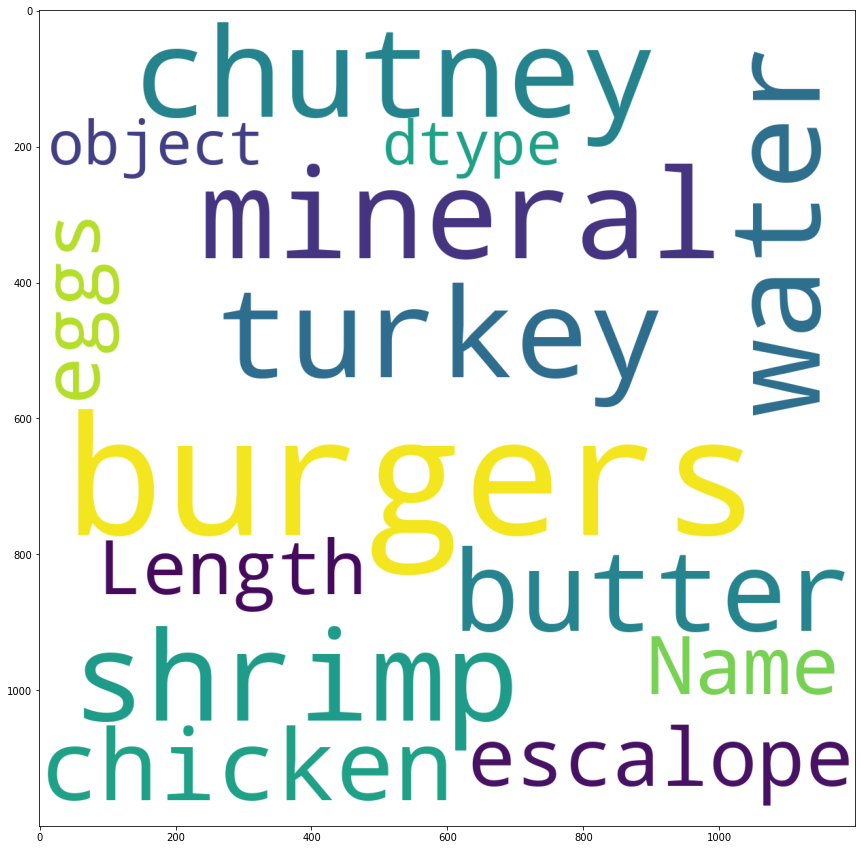

In [82]:
plt.rcParams['figure.figsize']=(15,15) 
wordcloud=WordCloud(background_color='white', width=1200, 
          height=1200, max_words=120).generate(str(data[0]))
plt.imshow(wordcloud)
#그림 크기(가로, 세로 ) 인치 단위

<AxesSubplot:>

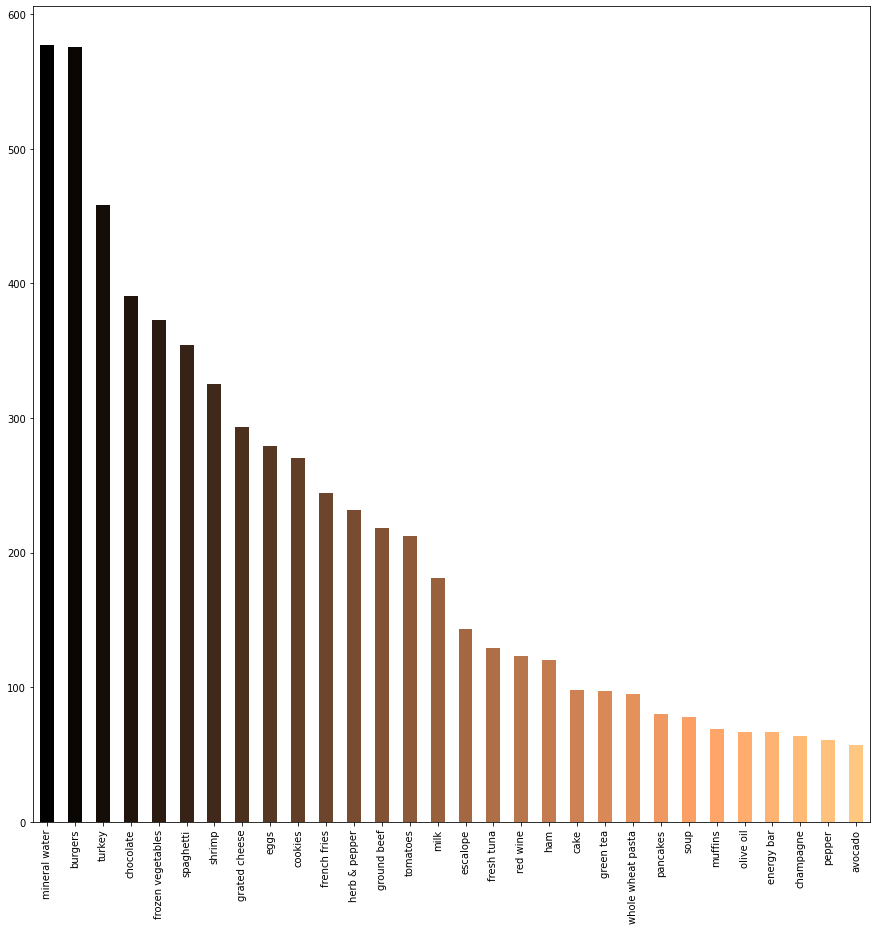

In [83]:
import numpy as np
data[0].value_counts().head(30).plot.bar(color=plt.cm.copper(np.linspace(0,1,30)))